# Prova 1 2023-2
# Larah
# questao 2


In [2]:
!pip install control

  Stored in directory: C:\Users\Aluno\AppData\Local\pip\Cache\wheels\c9\7c\a5\9e4bc5daf511c4d7f47235ba8e6f2f0f0ab267d43d4ad4d5e7
Successfully built control


In [1]:
import numpy as np
import control
import math
import cmath
import matplotlib.pyplot as plt


In [3]:
# periodo de amostragem
T = 0.15;

# função de transferência da planta
Gp = control.tf(1,[1, 5]);
Gpz = control.c2d(Gp,T);

# polo desejado
zeta = 0.6;
wn = 4;
s1 = -zeta*wn+1j*wn*(1-zeta**2)**.5;
z1 = np.exp(s1*T);

print(Gpz, z1)


  0.1055
----------
z - 0.4724

dt = 0.15
 (0.6188353589683089+0.32217239864789143j)


In [6]:
# Controlador
# Gd(z) = Kc*(z+alfa)/(z+beta1)(z+beta2)

# Função de transferência de laço aberto
# FTMA=Gdz*Gz

# condição de angulo --> angulo(FTMA)=+-180 graus quando z =z1 
# o ganho do controlador não interfere no angulo

# dividindo a FTMA de forma diferente
# FTMA = G1z*G2z
# onde G1z=1/(z+beta)
# e G2z=(z+alfa)*Gpz*(1/z-1)

# considalfaerando que o zero do controlador (alfa) cancela um polo da planta
polos = control.pole(Gpz);
print(polos)
alfa = -polos[0];

G2z = control.minreal(control.tf([1, alfa],[1,-1],T)*Gpz);
print(G2z)
[[n2]],[[d2]] = control.tfdata(G2z);

[0.47236655+0.j]
1 states have been removed from the model

0.1055
------
z - 1

dt = 0.15



In [7]:
# fi2 é o ângulo de G2z quando z=z1
fi2 = np.angle(np.polyval(n2,z1)/np.polyval(d2,z1));

# fi1 é o ângulo de G1z quando z=z1
fi1 = -np.pi-fi2;
beta = (np.imag(z1)-np.real(z1)*np.tan(-fi1))/np.tan(-fi1);

print("alfa = \n",alfa)
print("beta = \n",beta)

alfa = 
 (-0.4723665527410147-0j)
beta = 
 -0.23767071793661726


In [11]:
### modulo = 1
Gdz = control.tf([1,alfa], [1, beta-1, -beta],T)
FTMA = Gdz*Gpz
FTMA


TransferFunction(array([ 0.10552669+0.j, -0.04984728+0.j]), array([ 1.        , -1.71003727,  0.82230497, -0.1122677 ]), 0.15)

In [17]:
### modulo = 1
Gdz = control.tf([1,alfa], [1, beta-1, -beta],T)
FTMA = control.minreal(Gdz*Gpz)
FTMA

[[nf]],[[df]]= control.tfdata(FTMA);

aux = (np.polyval(nf, z1)/np.polyval(df, z1))/T

kc = 1/abs(aux)
kc


1 states have been removed from the model


0.3540547978676962

(array([[0.23767072+0.00000000e+00j, 1.        +0.00000000e+00j],
        [0.31080781+0.00000000e+00j, 0.9268629 -0.00000000e+00j],
        [0.40794332+0.00000000e+00j, 0.8297274 -0.00000000e+00j],
        [0.61883536+8.38286141e-09j, 0.61883536-8.38286144e-09j],
        [0.61883536+7.70068864e-02j, 0.61883536-7.70068864e-02j],
        [0.61883536+2.37351164e-01j, 0.61883536-2.37351164e-01j],
        [0.61883536+3.26712549e-01j, 0.61883536-3.26712549e-01j],
        [0.61883536+3.96417210e-01j, 0.61883536-3.96417210e-01j],
        [0.61883536+4.55578884e-01j, 0.61883536-4.55578884e-01j],
        [0.61883536+5.07895298e-01j, 0.61883536-5.07895298e-01j],
        [0.61883536+5.55304555e-01j, 0.61883536-5.55304555e-01j],
        [0.61883536+5.98973007e-01j, 0.61883536-5.98973007e-01j],
        [0.61883536+6.39667240e-01j, 0.61883536-6.39667240e-01j],
        [0.61883536+6.77923073e-01j, 0.61883536-6.77923073e-01j],
        [0.61883536+7.14132486e-01j, 0.61883536-7.14132486e-01j],
        [0

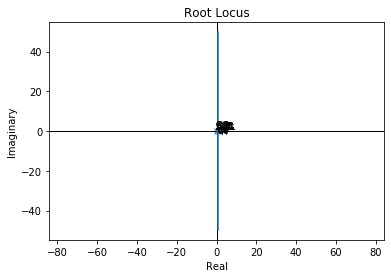

In [36]:
control.rlocus(FTMA, xlim = [-5, 5], ylim=[-5, 5])